<a href="https://colab.research.google.com/github/22130056-HoHoangDuy/Labs_ML/blob/main/22130056_HoHoangDuy_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#Import
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import numpy as np
import sklearn.metrics as m
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

In [38]:
#Connect to Drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML_Labs_Datasets'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML_Labs_Datasets


In [39]:
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
def preprocess_bank_data(df):
    numeric_features = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
    categorical_features = ['job', 'marital', 'education', 'default', 'housing',
                            'loan', 'contact', 'month', 'poutcome']

    preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

    X = df[numeric_features + categorical_features]
    y = df['deposit'].map({'yes': 1, 'no': 0})

    return X, y, preprocessor

def create_pipeline(preprocessor, classifier):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

def run_grid_search(pipeline, param_grid, X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    y_pred = grid.best_estimator_.predict(X_test)

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Best Params': grid.best_params_
    }

    return metrics, grid.best_estimator_, X_test, y_test

def plot_roc_curve(model, X_test, y_test):
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    return roc_auc

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [40]:
#Task1
from sklearn import datasets
iris = datasets.load_iris()

In [41]:
#Task1.1
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=3)),
    ('classifier', RandomForestClassifier())
])

pipeline.fit(iris.data, iris.target)
predictions = pipeline.predict(iris.data)

In [42]:
#Task1.2
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'kNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

param_grids = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10], 'classifier__solver': ['liblinear']},
    'Random Forest': {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 10, 20]},
    'kNN': {'classifier__n_neighbors': [3, 5, 7], 'classifier__metric': ['minkowski', 'euclidean']},
    'SVM': {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
}
results = {}

for name, classifier in classifiers.items():
    print(f"Running GridSearch for {name}...")

    current_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=3)),
        ('classifier', classifier)
    ])

    param_grid = param_grids[name]
    metrics, best_model, X_test, y_test = run_grid_search(
        current_pipeline, param_grid, iris.data, iris.target
    )

    results[name] = metrics

print("\nTask 1.2 Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        if isinstance(value, dict):
            print(f"  {metric_name}: {value}")
        else:
            print(f"  {metric_name}: {round(value, 4)}")



Running GridSearch for Logistic Regression...
Running GridSearch for Random Forest...
Running GridSearch for kNN...
Running GridSearch for SVM...

Task 1.2 Results:

Logistic Regression:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1 Score: 1.0
  Best Params: {'classifier__C': 10, 'classifier__solver': 'liblinear'}

Random Forest:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1 Score: 1.0
  Best Params: {'classifier__max_depth': None, 'classifier__n_estimators': 200}

kNN:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1 Score: 1.0
  Best Params: {'classifier__metric': 'minkowski', 'classifier__n_neighbors': 3}

SVM:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1 Score: 1.0
  Best Params: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}


In [43]:
#Task2
dataset1 = pd.read_csv("news.csv")
dataset1.drop_duplicates(keep="first", inplace=True)
stop_words = set(stopwords.words("english"))
lemma = WordNetLemmatizer()
def preprocessing(txt):
    tokens = word_tokenize(txt)
    words = [lemma.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return " ".join(words)
txt = dataset1["data"][0]
txt2 = preprocessing(txt)
dataset1["data"] = dataset1["data"].apply(preprocessing)
encoder=LabelEncoder()
dataset1['labels']=encoder.fit_transform(dataset1['labels'])
X_train, X_test, y_train, y_test = train_test_split(dataset1["data"],
dataset1["labels"], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer()
X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)

In [44]:
#Task2.1
vectorizer = TfidfVectorizer()
scaler = StandardScaler(with_mean=False)

rf_classifier = RandomForestClassifier()

selector = SelectFromModel(rf_classifier, threshold='mean')

pipeline_task2 = Pipeline([
    ('vectorizer', vectorizer),
    ('scaler', scaler),
    ('selector', selector),
    ('classifier', rf_classifier)
])

pipeline_task2.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('scaler', StandardScaler(with_mean=False)),
                ('selector',
                 SelectFromModel(estimator=RandomForestClassifier(),
                                 threshold='mean')),
                ('classifier', RandomForestClassifier())])

In [45]:
#Task2.2
classifiers = {
    'Logistic Regression': LogisticRegression(solver='saga'),
    'Random Forest': RandomForestClassifier(),
    'kNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

param_grids_task2 = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10], 'classifier__solver': ['saga']},
    'Random Forest': {'classifier__n_estimators': [100, 200], 'classifier__max_depth': [10, 20]},
    'kNN': {'classifier__n_neighbors': [5, 7], 'classifier__weights': ['uniform', 'distance']},
    'SVM': {'classifier__C': [0.1, 1], 'classifier__kernel': ['linear']}
}

def run_grid_search(pipeline, param_grid, X, y):
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X, y)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_model = grid_search.best_estimator_

    return {"best_score": best_score, "best_params": best_params}, best_model

results_task2 = {}

for name in classifiers:
    pipeline_task2.set_params(classifier=classifiers[name])
    metrics, _ = run_grid_search(pipeline_task2, param_grids_task2[name], dataset1["data"], dataset1["labels"])
    results_task2[name] = metrics

print("\nTask 2.2 Results:")
for name, metrics in results_task2.items():
    print(f"\n{name}:")
    for k, v in metrics.items():
        print(f"  {k}: {v if isinstance(v, dict) else round(v, 4)}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 


Task 2.2 Results:

Logistic Regression:
  best_score: 0.976
  best_params: {'classifier__C': 1, 'classifier__solver': 'saga'}

Random Forest:
  best_score: 0.9572
  best_params: {'classifier__max_depth': 20, 'classifier__n_estimators': 100}

kNN:
  best_score: 0.406
  best_params: {'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}

SVM:
  best_score: 0.9713
  best_params: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}


In [46]:
#Task3
dataset2 = pd.read_csv("bank.csv")

In [47]:
#Task3.1
numeric_features = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

pipeline_task3 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

le = LabelEncoder()
dataset2['deposit'] = le.fit_transform(dataset2['deposit'])

X = dataset2.drop('deposit', axis=1)
y = dataset2['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#Task3.2
pipeline_task3 = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(f_classif, k=10)),
    ('classifier', LogisticRegression())
])

preprocessed_data = preprocessor.fit_transform(X_train)

In [49]:
#Task3.3
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'kNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

def evaluate_classifier(clf, X_train, y_train, X_test, y_test, preprocessor):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('selector', SelectKBest(f_classif, k=10)),
        ('classifier', clf)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted')
    }

results = {name: evaluate_classifier(clf, X_train, y_train, X_test, y_test, preprocessor)
           for name, clf in classifiers.items()}

print("\nTask 3.3 Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for k, v in metrics.items():
        print(f"  {k}: {v:.4f}")


Task 3.3 Results:

Logistic Regression:
  Accuracy: 0.6502
  Precision: 0.6498
  Recall: 0.6502
  F1: 0.6495

Random Forest:
  Accuracy: 0.6467
  Precision: 0.6475
  Recall: 0.6467
  F1: 0.6468

kNN:
  Accuracy: 0.5979
  Precision: 0.5974
  Recall: 0.5979
  F1: 0.5940

SVM:
  Accuracy: 0.6597
  Precision: 0.6606
  Recall: 0.6597
  F1: 0.6598


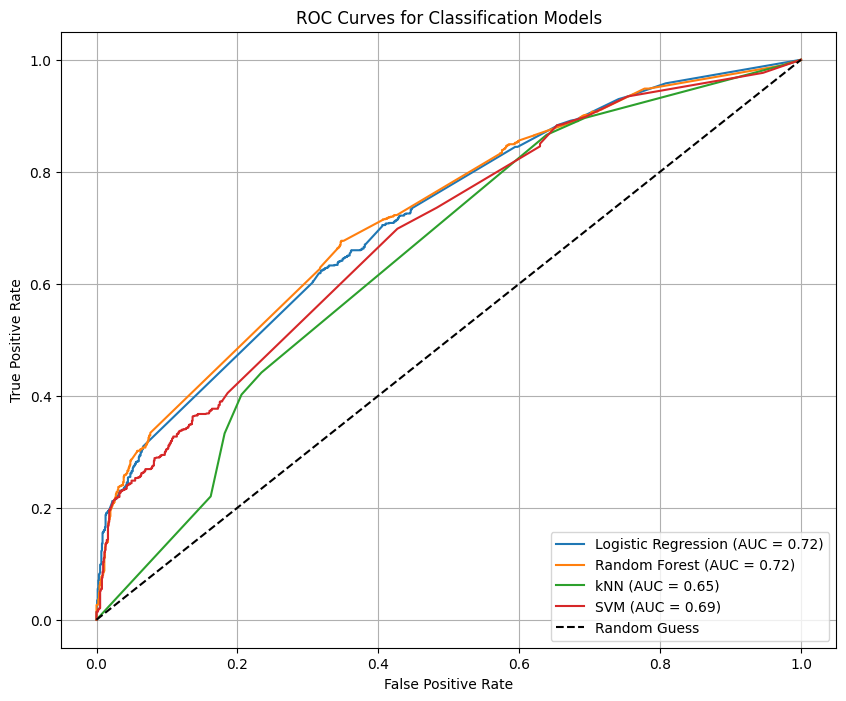

In [50]:
#Task3.5
from sklearn.metrics import roc_auc_score
def run_grid_search(pipeline, param_grid, X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    y_pred = grid.best_estimator_.predict(X_test)

    # Tính AUC nếu có predict_proba
    if hasattr(grid.best_estimator_, "predict_proba"):
        y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_proba)
    else:
        auc_score = None

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'AUC': auc_score,
        'Best Params': grid.best_params_,
        'Model': grid.best_estimator_  # Lưu mô hình để dùng sau
    }

    return metrics, X_test, y_test
def plot_roc_curve(model, X_test, y_test, label):
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        return None  # Không thể vẽ nếu không có xác suất

    fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc, label

param_grids_task3 = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10], 'classifier__solver': ['liblinear']},
    'Random Forest': {'classifier__n_estimators': [100, 200], 'classifier__max_depth': [10, 20]},
    'kNN': {'classifier__n_neighbors': [5, 7], 'classifier__weights': ['uniform', 'distance']},
    'SVM': {'classifier__C': [0.1, 1], 'classifier__kernel': ['linear']}
}
best_models = {}

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'kNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

for name, classifier in classifiers.items():
    pipeline_task3 = Pipeline([
        ('preprocessor', preprocessor),
        ('selector', SelectKBest(f_classif, k=10)),
        ('classifier', classifier)
    ])

    metrics, X_test, y_test = run_grid_search(pipeline_task3, param_grids_task3[name], X, y)
    best_models[name] = metrics

plt.figure(figsize=(10, 8))

for name, metrics in best_models.items():
    model = metrics['Model']
    auc_val = metrics.get("AUC", None)

    label = f"{name} (AUC = {auc_val:.2f})" if auc_val is not None else name
    result = plot_roc_curve(model, X_test, y_test, label)

    if result:
        fpr, tpr, roc_auc, label = result
        plt.plot(fpr, tpr, label=label)

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [51]:
#Task3.4
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    'kNN': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
}

def evaluate_best_model(clf, param_grid, X_train, y_train, X_test, y_test, preprocessor):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('selector', SelectKBest(f_classif, k=10)),
        ('classifier', clf)
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    return {
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted'),
        'Model': best_model
    }

best_models = {
    name: evaluate_best_model(clf, param_grids[name], X_train, y_train, X_test, y_test, preprocessor)
    for name, clf in classifiers.items()
}

print("\nTask 3.4 Results:")
for name, metrics in best_models.items():
    print(f"\n{name}:")
    for k, v in metrics.items():
        if k == 'Best Params':
            print(f"  {k}: {v}")
        elif k != 'Model':
            print(f"  {k}: {v:.4f}")


Task 3.4 Results:

Logistic Regression:
  Best Params: {'classifier__C': 1, 'classifier__solver': 'saga'}
  Accuracy: 0.6502
  Precision: 0.6498
  Recall: 0.6502
  F1: 0.6495

Random Forest:
  Best Params: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
  Accuracy: 0.6588
  Precision: 0.6595
  Recall: 0.6588
  F1: 0.6589

kNN:
  Best Params: {'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}
  Accuracy: 0.6108
  Precision: 0.6157
  Recall: 0.6108
  F1: 0.5998

SVM:
  Best Params: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
  Accuracy: 0.6538
  Precision: 0.6542
  Recall: 0.6538
  F1: 0.6540
